In [2]:
import pandas as pd
import geopandas as gpd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.spatial import distance
import math
from random import sample
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from IPython.display import clear_output
import time

# Data science

In [163]:
df_target = pd.read_pickle('D:\\UTSEUS\\datascience\\data\\Hackathon\\pickles\\TARGET-communities-extract-wellbeing.pkl')
df_target = pd.DataFrame(df_target,columns=['community', 'clean', 'smell', 'noise', 'town', 'district', 'longitude', 'latitude'])
df_target = df_target.drop(df_target.index[0])
df_target['smell'].replace('', np.nan, inplace=True)
df_target['longitude'].replace('', np.nan, inplace=True)
df_target['latitude'].replace('', np.nan, inplace=True)
df_target = df_target.dropna() 
df_target = df_target.reset_index(drop=True)
df_target

,community,clean,smell,noise,town,district,longitude,latitude
0,万寿社区居委会,3,0.0,0.0,盈浦街道,青浦区,121.104287016932,31.1558823799679
1,万泰花园第一居委会,3,1.0,0.0,七宝镇,闵行区,121.351529089795,31.144326843509
2,万科阳光苑居委会,2,0.0,0.0,吴泾镇,闵行区,121.468520387505,31.0422853979528
3,万豪居委会,3,0.0,0.0,长征镇,普陀区,121.367237458941,31.2407251034807
4,万馨居委会,3,0.0,0.0,川沙新镇,浦东新区,121.668505522212,31.1953057158861
5,三泉路一零一五弄居委会,3,0.0,0.0,彭浦新村街道,静安区,121.43631336367,31.3199436665669
6,三泉路七七零弄居委会,3,0.0,0.0,彭浦新村街道,静安区,121.436859112757,31.3170628592636
7,三湘居委会,3,0.0,0.0,五角场街道,杨浦区,121.485432275279,31.3020103279143
8,三湘盛世花苑居委会,2,0.0,0.0,张庙街道,宝山区,121.447584620833,31.3274228855577
9,上南五村居委会,3,0.0,0.0,周家渡街道,浦东新区,121.495845054905,31.1819830763579


In [164]:
#Inverting coefficient for smelling and noisy

list_smell = []
list_noise = []

for i in range (len(df_target)):
    if df_target.iloc[i,2] == '0.0':
        list_smell.append(1)
    else:
        list_smell.append(0)
    if df_target.iloc[i,3] == '0.0':
        list_noise.append(1)
    else:
        list_noise.append(0)
    
df_target['smell'] = list_smell
df_target['noise'] = list_noise
df_target['clean'] = df_target['clean'].astype(int)
df_target

,community,clean,smell,noise,town,district,longitude,latitude
0,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679
1,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509
2,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528
3,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807
4,万馨居委会,3,1,1,川沙新镇,浦东新区,121.668505522212,31.1953057158861
5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.43631336367,31.3199436665669
6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859112757,31.3170628592636
7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432275279,31.3020103279143
8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447584620833,31.3274228855577
9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845054905,31.1819830763579


In [166]:
#creating a score indicator based on the three first indicators

score_list = []
for i in range (len(df_target)):
    score_list.append(df_target.iloc[i,1]/(3*4)+df_target.iloc[i,2]/3+df_target.iloc[i,3]/3)
    
df_target['score'] = score_list
df_target    

,community,clean,smell,noise,town,district,longitude,latitude,score
0,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679,0.916667
1,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509,0.583333
2,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528,0.833333
3,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807,0.916667
4,万馨居委会,3,1,1,川沙新镇,浦东新区,121.668505522212,31.1953057158861,0.916667
5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.43631336367,31.3199436665669,0.916667
6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859112757,31.3170628592636,0.916667
7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432275279,31.3020103279143,0.916667
8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447584620833,31.3274228855577,0.833333
9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845054905,31.1819830763579,0.916667


In [167]:
#We want to use mobike location as an information to predict well being

In [168]:
df_mobike = pd.read_csv('D:\\UTSEUS\\datascience\\data\\Hackathon\\Urban Data Hackathon\\UTSEUS-MOBIKE-shanghai_full.csv')
df_mobike

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
0,1,324731,7541,2016-08-28 00:00,121.490,31.280,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1..."
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1..."
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1..."
3,10,93155,12616,2016-08-28 00:00,121.436,31.320,2016-08-28 00:12,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1..."
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1..."
5,13,127840,9570,2016-08-28 00:00,121.353,31.285,2016-08-28 00:07,121.362,31.283,"121.353,31.285#121.354,31.285#121.354,31.286#1..."
6,15,125990,15692,2016-08-28 00:00,121.441,31.228,2016-08-28 00:30,121.455,31.190,"121.440,31.224#121.440,31.225#121.440,31.226#1..."
7,16,346549,4373,2016-08-28 00:00,121.426,31.222,2016-08-28 00:31,121.423,31.268,"121.419,31.241#121.420,31.240#121.420,31.241#1..."
8,17,352552,350,2016-08-28 00:00,121.524,31.301,2016-08-28 00:14,121.518,31.291,"121.518,31.291#121.519,31.291#121.520,31.291#1..."
9,20,351480,16317,2016-08-28 00:00,121.442,31.313,2016-08-28 00:10,121.453,31.311,"121.442,31.313#121.443,31.313#121.444,31.310#1..."


In [169]:
#number of mobike starting location in a buffer of 100m from any point in the dataset
#is there a lot of mobike available in the area ?
#no need to use the end location, after each end of trip there is most likely a start from the same location

In [170]:
#cannot import CRS to convert coordinates to meters

#transformer les coordonnées en mètre
from pyproj import CRS

mercator = CRS.from_epsg(4326)
china = CRS.from_epsg(4479)

from pyproj import Transformer

transformer = Transformer.from_crs(mercator, china, always_xy=True)

#cannot import crs from now using only coordinates
#buffer of 0,01 around 100m

In [171]:
type(df_target.iloc[i,6])

str

In [172]:
#converting coordinates into points

from shapely.geometry import Point

list_points = []

for i in range (len(df_target)):
    point = Point(float(df_target.iloc[i,6]),float(df_target.iloc[i,7]))
    list_points.append(point)


df_target['coordinates'] = list_points
df_target

#gdf_taxis = gpd.GeoDataFrame(df_mobike,geometry=gpd.points_from_xy(df_mobike.start_location_x,df_mobike.start_location_y))
#gdf_target = gpd.GeoDataFrame(df_target,geometry=gpd.points_from_xy(df_target.longitude,target.latitude))

,community,clean,smell,noise,town,district,longitude,latitude,score,coordinates
0,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679,0.916667,POINT (121.104287016932 31.1558823799679)
1,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509,0.583333,POINT (121.351529089795 31.144326843509)
2,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528,0.833333,POINT (121.468520387505 31.0422853979528)
3,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807,0.916667,POINT (121.367237458941 31.2407251034807)
4,万馨居委会,3,1,1,川沙新镇,浦东新区,121.668505522212,31.1953057158861,0.916667,POINT (121.668505522212 31.1953057158861)
5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.43631336367,31.3199436665669,0.916667,POINT (121.43631336367 31.3199436665669)
6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859112757,31.3170628592636,0.916667,POINT (121.436859112757 31.3170628592636)
7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432275279,31.3020103279143,0.916667,POINT (121.485432275279 31.3020103279143)
8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447584620833,31.3274228855577,0.833333,POINT (121.447584620833 31.3274228855577)
9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845054905,31.1819830763579,0.916667,POINT (121.495845054905 31.1819830763579)


In [173]:
list_points = []

for i in range (len(df_mobike)):
    point = Point(float(df_mobike.iloc[i,4]),float(df_mobike.iloc[i,5]))
    list_points.append(point)


df_mobike['starting_coordinates'] = list_points
df_mobike

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,starting_coordinates
0,1,324731,7541,2016-08-28 00:00,121.490,31.280,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",POINT (121.49 31.28)
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",POINT (121.462 31.313)
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",POINT (121.416 31.154)
3,10,93155,12616,2016-08-28 00:00,121.436,31.320,2016-08-28 00:12,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",POINT (121.436 31.32)
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",POINT (121.459 31.325)
5,13,127840,9570,2016-08-28 00:00,121.353,31.285,2016-08-28 00:07,121.362,31.283,"121.353,31.285#121.354,31.285#121.354,31.286#1...",POINT (121.353 31.285)
6,15,125990,15692,2016-08-28 00:00,121.441,31.228,2016-08-28 00:30,121.455,31.190,"121.440,31.224#121.440,31.225#121.440,31.226#1...",POINT (121.441 31.228)
7,16,346549,4373,2016-08-28 00:00,121.426,31.222,2016-08-28 00:31,121.423,31.268,"121.419,31.241#121.420,31.240#121.420,31.241#1...",POINT (121.426 31.222)
8,17,352552,350,2016-08-28 00:00,121.524,31.301,2016-08-28 00:14,121.518,31.291,"121.518,31.291#121.519,31.291#121.520,31.291#1...",POINT (121.524 31.301)
9,20,351480,16317,2016-08-28 00:00,121.442,31.313,2016-08-28 00:10,121.453,31.311,"121.442,31.313#121.443,31.313#121.444,31.310#1...",POINT (121.442 31.313)


In [174]:
#reducing the length of df_mobike to reduce the calculation time
df_mobike = df_mobike.sample(int(len(df_mobike)/10))

In [175]:
#counting the number of starting mobike close to each community
import time

list_count = []
t = time.time()

for i in range (len(df_target)):
    c = 0
    for j in range (len(df_mobike)):
        if df_target.iloc[i,-1].distance(df_mobike.iloc[j,-1]) < 0.01:
            c+=1
    list_count.append(c)
    
print(time.time()-t)
print(list_count)

1189.7714037895203
[0, 146, 7, 827, 10, 809, 811, 1743, 1342, 193, 19, 0, 185, 27, 0, 150, 218, 751, 134, 0, 52, 1208, 146, 1030, 1030, 2296, 1264, 0, 1120, 1225, 7, 976, 1519, 93, 1154, 1453, 793, 1099, 0, 91, 0, 1247, 63, 1562, 6, 331, 3, 1116, 105, 0, 116, 381, 859, 285, 1254, 1180, 128, 99, 91, 123, 0, 0, 0, 746, 0, 667, 967, 197, 553, 115, 367, 902, 829, 1126, 882, 1519, 1090, 147, 143, 122, 3, 329, 1041, 1329, 6, 4, 1051, 1881, 2140, 1637, 1044, 277, 368, 56, 116, 2, 872, 0, 92, 1483, 1383, 941, 5, 46, 4, 0, 124, 0, 0, 1185, 0, 365, 857, 907, 730, 57, 159, 1046, 1699, 1859, 426, 1340, 152, 3, 0, 105, 7, 397, 0, 0, 1774, 1181, 358, 358, 23, 770, 23, 0, 34, 24, 97, 4, 336, 6, 956, 2404, 1795, 1795, 710, 1339, 886, 0, 1477, 1452, 27, 1325, 1326, 1815, 0, 32, 224, 1023, 1251, 2407, 1372, 1037, 701, 683, 0, 1316, 2, 0, 1263, 1, 410, 1012, 0, 1019, 668, 855, 942, 525, 5, 151, 855, 942, 525, 5, 151, 200, 0, 563, 774, 728, 1317, 1149, 567, 0, 0, 186, 72, 4, 1368, 1053, 0, 0, 0, 887, 0, 3

In [176]:
df_target['mobike_count'] = list_count
df_target

,community,clean,smell,noise,town,district,longitude,latitude,score,coordinates,mobike_count
0,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679,0.916667,POINT (121.104287016932 31.1558823799679),0
1,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509,0.583333,POINT (121.351529089795 31.144326843509),146
2,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528,0.833333,POINT (121.468520387505 31.0422853979528),7
3,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807,0.916667,POINT (121.367237458941 31.2407251034807),827
4,万馨居委会,3,1,1,川沙新镇,浦东新区,121.668505522212,31.1953057158861,0.916667,POINT (121.668505522212 31.1953057158861),10
5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.43631336367,31.3199436665669,0.916667,POINT (121.43631336367 31.3199436665669),809
6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859112757,31.3170628592636,0.916667,POINT (121.436859112757 31.3170628592636),811
7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432275279,31.3020103279143,0.916667,POINT (121.485432275279 31.3020103279143),1743
8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447584620833,31.3274228855577,0.833333,POINT (121.447584620833 31.3274228855577),1342
9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845054905,31.1819830763579,0.916667,POINT (121.495845054905 31.1819830763579),193


In [177]:
df_target.to_pickle('D:\\UTSEUS\\datascience\\df_target.pkl')

In [178]:
df_target = pd.read_pickle('D:\\UTSEUS\\datascience\\df_target.pkl')
df_target

,community,clean,smell,noise,town,district,longitude,latitude,score,coordinates,mobike_count
0,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679,0.916667,POINT (121.104287016932 31.1558823799679),0
1,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509,0.583333,POINT (121.351529089795 31.144326843509),146
2,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528,0.833333,POINT (121.468520387505 31.0422853979528),7
3,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807,0.916667,POINT (121.367237458941 31.2407251034807),827
4,万馨居委会,3,1,1,川沙新镇,浦东新区,121.668505522212,31.1953057158861,0.916667,POINT (121.668505522212 31.1953057158861),10
5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.43631336367,31.3199436665669,0.916667,POINT (121.43631336367 31.3199436665669),809
6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859112757,31.3170628592636,0.916667,POINT (121.436859112757 31.3170628592636),811
7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432275279,31.3020103279143,0.916667,POINT (121.485432275279 31.3020103279143),1743
8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447584620833,31.3274228855577,0.833333,POINT (121.447584620833 31.3274228855577),1342
9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845054905,31.1819830763579,0.916667,POINT (121.495845054905 31.1819830763579),193


In [179]:
df_poi = pd.read_pickle('D:\\UTSEUS\\datascience\\data\\Hackathon\\pickles\\utseus-cendus-poi.pk')
df_poi

,NAME,GPSX,GPSY,GBCODE,category,subcategory,subsubcategory
0,2015年中国国际纱线(春夏)展览会,121.296368,31.188324,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
1,勃兰登堡之声-2015家庭音乐会,121.473360,31.228923,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
2,2015第十四届(上海)国际有机食品和绿色食品博览会,121.399378,31.205028,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
3,星星火炬上海组委会,121.529628,31.271063,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
4,2016VGT国际铁人三项赛,121.169185,31.282332,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
5,2016上海劳力士大师赛,121.352903,31.042228,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
6,2016环球旅讯峰会,121.200031,31.097267,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
7,美得与众不同-荣耀8新品发布会,121.472734,31.157160,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
8,史努比路跑圣诞派对,121.523650,31.385720,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
9,2016年全球敏捷运维峰会,121.528775,31.294488,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name


In [180]:
#transform longitude and latitude into shapely Point

list_points = []

for i in range (len(df_poi)):
    point = Point(float(df_poi.iloc[i,1]),float(df_poi.iloc[i,2]))
    list_points.append(point)


df_poi['coordinates'] = list_points
df_poi

,NAME,GPSX,GPSY,GBCODE,category,subcategory,subsubcategory,coordinates
0,2015年中国国际纱线(春夏)展览会,121.296368,31.188324,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.296368 31.188324)
1,勃兰登堡之声-2015家庭音乐会,121.473360,31.228923,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.47336 31.228923)
2,2015第十四届(上海)国际有机食品和绿色食品博览会,121.399378,31.205028,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.399378 31.205028)
3,星星火炬上海组委会,121.529628,31.271063,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.529628 31.271063)
4,2016VGT国际铁人三项赛,121.169185,31.282332,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.169185 31.282332)
5,2016上海劳力士大师赛,121.352903,31.042228,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.352903 31.042228)
6,2016环球旅讯峰会,121.200031,31.097267,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.200031 31.097267)
7,美得与众不同-荣耀8新品发布会,121.472734,31.157160,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.472734 31.15716)
8,史努比路跑圣诞派对,121.523650,31.385720,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.52365 31.38572)
9,2016年全球敏捷运维峰会,121.528775,31.294488,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.528775 31.294488)


In [181]:
#deciding what category we could use to predict the wellbeig
category = []
c=0

for i in range (1, len(df_poi)):
    if df_poi.iloc[i,4] == df_poi.iloc[i-1,4]:
        c+=1
    else:
        category.append([df_poi.iloc[i,4],c])
        c=0

category

#life service and shopping can be interesting to complete our prediction of the wellbeing
#main preocupations of people
#accessibility (mobike)
#service (life service)
#culture (science and education culture)
#leisure (shopping)

[['Transportation', 58],
 ['Organ group', 42592],
 ['Shopping', 0],
 ['Restaurant', 0],
 ['Transportation', 1],
 [nan, 45839],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 ['Transportation', 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [nan, 0],
 [

In [182]:
df_poi = df_poi_copy

In [183]:
df_poi = df_poi.sample(int(len(df_poi)/100))

#counting the number of starting mobike close to each community
import time

service_count = []
leisure_count = []
culture_count = []
t = time.time()

for i in range (len(df_target)):
    h = 0
    l = 0
    c = 0
    for j in range (len(df_poi)):
        if df_target.iloc[i,-2].distance(df_poi.iloc[j,-1]) < 0.01 and df_poi.iloc[j,4] == 'Science and education culture':
            c+=1
        if df_target.iloc[i,-2].distance(df_poi.iloc[j,-1]) < 0.01 and df_poi.iloc[j,4] == 'Life service':
            h+=1
        if df_target.iloc[i,-2].distance(df_poi.iloc[j,-1]) < 0.01 and df_poi.iloc[j,4] == 'Shopping':
            l+=1
    service_count.append(h)
    leisure_count.append(l)
    culture_count.append(c)                                                                              
    
print(time.time()-t)
print(health_count)

565.3205840587616
[16, 8, 2, 7, 0, 5, 6, 9, 10, 5, 2, 4, 14, 8, 0, 4, 4, 7, 2, 8, 5, 15, 4, 25, 25, 7, 23, 0, 4, 18, 0, 6, 19, 5, 27, 36, 25, 12, 5, 6, 2, 32, 5, 5, 2, 7, 0, 14, 2, 2, 2, 1, 5, 2, 9, 3, 6, 7, 7, 4, 7, 1, 5, 9, 1, 5, 11, 1, 7, 13, 5, 15, 9, 11, 23, 16, 24, 6, 5, 6, 1, 10, 16, 20, 1, 0, 10, 9, 6, 33, 11, 10, 4, 4, 5, 8, 14, 5, 6, 12, 7, 19, 1, 1, 8, 0, 2, 4, 0, 18, 3, 1, 5, 7, 6, 4, 0, 15, 22, 19, 8, 22, 4, 7, 2, 3, 13, 6, 4, 4, 6, 18, 2, 2, 2, 11, 3, 2, 3, 3, 5, 0, 1, 12, 12, 10, 6, 6, 15, 42, 7, 2, 37, 27, 1, 27, 24, 23, 1, 1, 5, 12, 27, 10, 10, 31, 2, 3, 1, 12, 2, 0, 6, 4, 7, 10, 0, 27, 9, 22, 27, 8, 2, 8, 22, 27, 8, 2, 8, 1, 0, 13, 14, 16, 5, 12, 12, 7, 1, 9, 0, 3, 35, 10, 1, 11, 5, 4, 0, 8, 13, 1, 12, 3, 21, 1, 14, 13, 27, 9, 9, 16, 8, 12, 6, 34, 33, 23, 3, 0, 5, 7, 13, 29, 8, 1, 41, 2, 4, 0, 6, 5, 12, 14, 7, 7, 6, 8, 9, 17, 9, 0, 1, 8, 4, 4, 2, 2, 0, 5, 8, 2, 19, 6, 0, 6, 3, 3, 2, 20, 3, 1, 1, 1, 2, 4, 11, 12, 17, 15, 8, 4, 7, 11, 9, 14, 11, 16, 3, 1, 33, 2, 2, 2, 2

In [184]:
df_target['service_count'] = health_count
df_target['leisure_count'] = leisure_count
df_target['culture_count'] = culture_count
df_target

,community,clean,smell,noise,town,district,longitude,latitude,score,coordinates,mobike_count,service_count,leisure_count,culture_count
0,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679,0.916667,POINT (121.104287016932 31.1558823799679),0,16,25,2
1,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509,0.583333,POINT (121.351529089795 31.144326843509),146,8,11,3
2,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528,0.833333,POINT (121.468520387505 31.0422853979528),7,2,4,0
3,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807,0.916667,POINT (121.367237458941 31.2407251034807),827,7,7,0
4,万馨居委会,3,1,1,川沙新镇,浦东新区,121.668505522212,31.1953057158861,0.916667,POINT (121.668505522212 31.1953057158861),10,0,6,1
5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.43631336367,31.3199436665669,0.916667,POINT (121.43631336367 31.3199436665669),809,5,25,2
6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859112757,31.3170628592636,0.916667,POINT (121.436859112757 31.3170628592636),811,6,20,2
7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432275279,31.3020103279143,0.916667,POINT (121.485432275279 31.3020103279143),1743,9,8,3
8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447584620833,31.3274228855577,0.833333,POINT (121.447584620833 31.3274228855577),1342,10,21,4
9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845054905,31.1819830763579,0.916667,POINT (121.495845054905 31.1819830763579),193,5,8,0


In [ ]:
df_target.to_pickle('D:\\UTSEUS\\datascience\\df_target.pkl')

In [288]:
df_anjuke = pd.read_csv('D:\\UTSEUS\\datascience\\data\\UTSEUS-anjuke-real-estate-baoshan.csv')
df_anjuke

list_points = []

for i in range (len(df_anjuke)):
    point = Point(float(df_anjuke.iloc[i,2]),float(df_anjuke.iloc[i,3]))
    list_points.append(point)


df_anjuke['coordinates'] = list_points
df_anjuke

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done,coordinates
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1,POINT (121.34392735101 31.3193561718426)
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1,POINT (121.407324884273 31.3023675431043)
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1,POINT (121.421397234518 31.302658471085)
5,A884671692,宝山-大场 大华三村,121.412740,31.289435,1,1,40.0,2000000.0,50000.000000,大华三村 近地铁站 周边配套成熟 满5年 业主置换急售,baoshan,dachang,1,POINT (121.412739759259 31.2894351908505)
6,A886391847,宝山-大场 米扬公寓,121.418005,31.283723,2,1,31.0,780000.0,25161.290323,宝山大场 首付39w 精装地铁口 全明户型 通风效果及佳,baoshan,dachang,1,POINT (121.418005102289 31.2837228435396)
7,A885392995,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,66.0,4350000.0,65909.090909,琉樽尚品，刚出1+1，婚装30万，一天都没住过全新家具就送您,baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)
8,A873049605,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,93.0,4050000.0,43548.387097,金地精装大两房，满两年，诚意急售，价格可谈，看房基本方便,baoshan,dachang,1,POINT (121.34392735101 31.3193561718426)
9,A880302877,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1,POINT (121.397487377268 31.2908711986862)


In [289]:
import time

average_price = []
t = time.time()

for i in range (len(df_target)):
    average = 0
    c = 0
    for j in range (len(df_anjuke)):
        if df_target.iloc[i,9].distance(df_anjuke.iloc[j,-1]) < 0.1:
            average = average + int(df_anjuke.iloc[j,8])
            c+=1
    if c > 0:
        average_price.append(average/c)
    else:
        average_price.append(np.nan)
    
print(time.time()-t)
print(average_price)

348.85490012168884
[nan, nan, nan, 53844.012638835695, nan, 47458.89361061888, 47911.541127922974, 50381.01993729793, 47489.427083682145, 39237.11111111111, 49348.94374563242, nan, 50862.4748427673, nan, nan, 42660.416666666664, 42660.416666666664, 50723.74102251978, 42660.416666666664, nan, 53593.32458563536, 50653.34247135843, 53130.5, 55249.188750471876, 55249.188750471876, 50498.85170919596, 55351.12369922793, nan, 51092.391898762784, 53211.14751381215, nan, 47990.87926672904, 57600.23870967742, nan, 53623.84099920698, 55469.57603881038, 57308.410676156585, 53339.65040478705, 44619.64705882353, nan, nan, 54113.59948666443, 49490.50956937799, 49911.25222119082, 33449.2676056338, 55522.69468479604, nan, 52001.295876472686, nan, 44619.64705882353, 46802.79629804514, 47226.835559786, 47234.78805774278, 47384.000101985315, 50488.600655241935, 50365.44929127094, nan, nan, nan, 53130.5, nan, nan, nan, 54399.02335504154, nan, nan, 58637.16766467066, nan, 57344.38935056941, nan, 47505.80711

In [299]:
df_target_v2 = df_target.copy()

In [301]:
df_target_v2['real_estate'] = average_price
df_target_v2 = df_target_v2.dropna()
df_target_v2

,community,clean,smell,noise,town,district,longitude,latitude,score,coordinates,mobike_count,service_count,leisure_count,culture_count,classe,real_estate
3,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807,0.916667,POINT (121.367237458941 31.2407251034807),0.487108,-0.208973,-0.455918,-0.850937,very happy,53844.012639
5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.43631336367,31.3199436665669,0.916667,POINT (121.43631336367 31.3199436665669),0.456042,-0.451038,0.747341,-0.007474,very happy,47458.893611
6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859112757,31.3170628592636,0.916667,POINT (121.436859112757 31.3170628592636),0.459494,-0.330006,0.413102,-0.007474,very happy,47911.541128
7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432275279,31.3020103279143,0.916667,POINT (121.485432275279 31.3020103279143),2.068010,0.033092,-0.389071,0.414258,very happy,50381.019937
8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447584620833,31.3274228855577,0.833333,POINT (121.447584620833 31.3274228855577),1.375934,0.154125,0.479950,0.835990,happy,47489.427084
9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845054905,31.1819830763579,0.916667,POINT (121.495845054905 31.1819830763579),-0.607098,-0.451038,-0.389071,-0.850937,very happy,39237.111111
10,上炼新村二居委会,3,1,1,高桥镇,浦东新区,121.566878362846,31.3390515476908,0.916667,POINT (121.566878362846 31.3390515476908),-0.907400,-0.814136,-0.589614,-0.007474,very happy,49348.943746
12,东南居委会,2,1,1,潍坊新村街道,浦东新区,121.511941125382,31.2272922646263,0.833333,POINT (121.511941125382 31.2272922646263),-0.620905,0.638256,0.346254,-0.429206,happy,50862.474843
15,东城新村第六居委会,2,1,1,花木街道,浦东新区,121.528614912248,31.2012361296437,0.833333,POINT (121.528614912248 31.2012361296437),-0.681310,-0.572071,-0.589614,-0.429206,happy,42660.416667
16,东城新村第四居委会,3,1,1,花木街道,浦东新区,121.532967564401,31.2062656736219,0.916667,POINT (121.532967564401 31.2062656736219),-0.563951,-0.572071,-0.522766,-0.429206,very happy,42660.416667


In [ ]:
df_target_v2.to_csv('D:\\UTSEUS\\datascience\\df_target_v2.csv')

In [ ]:
#discussion we dont have data for every community. We accept to lose some data to add a column.

# Machine learning

In [206]:
#starting machine learning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_target['mobike_count'] = scaler.fit_transform(df_target[['mobike_count']])
df_target['service_count'] = scaler.fit_transform(df_target[['service_count']])
df_target['leisure_count'] = scaler.fit_transform(df_target[['leisure_count']])
df_target['culture_count'] = scaler.fit_transform(df_target[['culture_count']])
df_target

,community,clean,smell,noise,town,district,longitude,latitude,score,coordinates,mobike_count,service_count,leisure_count,culture_count
0,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679,0.916667,POINT (121.104287016932 31.1558823799679),-0.940192,0.880321,0.747341,-0.007474
1,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509,0.583333,POINT (121.351529089795 31.144326843509),-0.688214,-0.087940,-0.188527,0.414258
2,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528,0.833333,POINT (121.468520387505 31.0422853979528),-0.928110,-0.814136,-0.656461,-0.850937
3,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807,0.916667,POINT (121.367237458941 31.2407251034807),0.487108,-0.208973,-0.455918,-0.850937
4,万馨居委会,3,1,1,川沙新镇,浦东新区,121.668505522212,31.1953057158861,0.916667,POINT (121.668505522212 31.1953057158861),-0.922933,-1.056202,-0.522766,-0.429206
5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.43631336367,31.3199436665669,0.916667,POINT (121.43631336367 31.3199436665669),0.456042,-0.451038,0.747341,-0.007474
6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859112757,31.3170628592636,0.916667,POINT (121.436859112757 31.3170628592636),0.459494,-0.330006,0.413102,-0.007474
7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432275279,31.3020103279143,0.916667,POINT (121.485432275279 31.3020103279143),2.068010,0.033092,-0.389071,0.414258
8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447584620833,31.3274228855577,0.833333,POINT (121.447584620833 31.3274228855577),1.375934,0.154125,0.479950,0.835990
9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845054905,31.1819830763579,0.916667,POINT (121.495845054905 31.1819830763579),-0.607098,-0.451038,-0.389071,-0.850937


In [207]:
Y = df_target['score']
X = df_target[['mobike_count', 'service_count', 'leisure_count', 'culture_count']]
X

,mobike_count,service_count,leisure_count,culture_count
0,-0.940192,0.880321,0.747341,-0.007474
1,-0.688214,-0.087940,-0.188527,0.414258
2,-0.928110,-0.814136,-0.656461,-0.850937
3,0.487108,-0.208973,-0.455918,-0.850937
4,-0.922933,-1.056202,-0.522766,-0.429206
5,0.456042,-0.451038,0.747341,-0.007474
6,0.459494,-0.330006,0.413102,-0.007474
7,2.068010,0.033092,-0.389071,0.414258
8,1.375934,0.154125,0.479950,0.835990
9,-0.607098,-0.451038,-0.389071,-0.850937


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  48.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 125.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 157.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         12.]),
 array([0.16666667, 0.175     , 0.18333333, 0.19166667, 0.2       ,
        0.20833333, 0.21666667, 0.225     , 0.23333333, 0.24166667,
        0.25      , 0.25833333, 0.26666667, 0.275     , 0.28333333,
        0.29166667, 0.3       , 0.30833333, 0.31666667, 0.325     ,
        0.33333333, 0.34166667, 0.35      , 0.

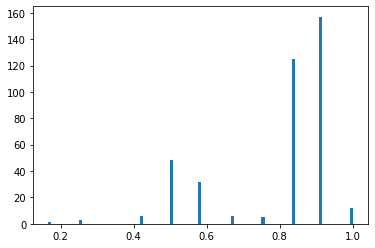

In [208]:
plt.hist(Y,100)

In [209]:
#making classification
#np.quantile(Y,0.75)
Z = pd.DataFrame.copy(Y)
Z[Y < np.quantile(Y,0.25)] = 'very unhappy'
Z[Y >= np.quantile(Y,0.25)] = 'unhappy'
Z[Y >= np.quantile(Y,0.5)] = 'happy'
Z[Y >= np.quantile(Y,0.75)] = 'very happy'
Z

0        very happy
1      very unhappy
2             happy
3        very happy
4        very happy
5        very happy
6        very happy
7        very happy
8             happy
9        very happy
10       very happy
11     very unhappy
12            happy
13            happy
14            happy
15            happy
16       very happy
17            happy
18            happy
19            happy
20       very happy
21     very unhappy
22       very happy
23       very happy
24       very happy
25     very unhappy
26       very happy
27            happy
28     very unhappy
29     very unhappy
           ...     
365           happy
366      very happy
367           happy
368    very unhappy
369      very happy
370    very unhappy
371    very unhappy
372      very happy
373    very unhappy
374    very unhappy
375           happy
376           happy
377           happy
378      very happy
379    very unhappy
380           happy
381           happy
382      very happy
383      very happy


In [243]:
df_target['classe'] = Z
df_target.to_csv('D:\\UTSEUS\\datascience\\df_target.csv')

In [236]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X,Z)
scores = cross_val_score(clf, X, Z, cv = 5)
np.mean(scores)
#changing the max depth modify the score. Decreasing from the beginning, we are quicly overfitting
#the best is max depth equal two

0.42528075300227197

[Text(167.4, 181.2, 'X[0] <= -0.926\nentropy = 0.658\nsamples = 395\nvalue = [125, 5, 169, 96]'),
 Text(83.7, 108.72, 'X[1] <= -0.633\nentropy = 0.646\nsamples = 89\nvalue = [19, 1, 29, 40]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.66\nsamples = 55\nvalue = [12, 1, 21, 21]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.59\nsamples = 34\nvalue = [7, 0, 8, 19]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 3.366\nentropy = 0.637\nsamples = 306\nvalue = [106, 4, 140, 56]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.633\nsamples = 302\nvalue = [105, 4, 140, 53]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.375\nsamples = 4\nvalue = [1, 0, 0, 3]')]

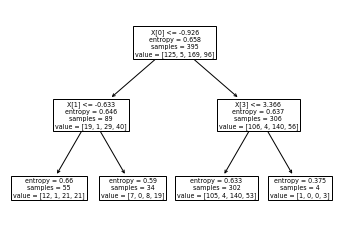

In [223]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X,Z)
tree.plot_tree(clf.fit(X,Z))

In [246]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 2)
clf = clf.fit(X,Z)
scores = cross_val_score(clf, X, Z, cv = 2)
np.mean(scores)

0.4430058455543021

In [252]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1)
clf = clf.fit(X,Z)
scores = cross_val_score(clf, X, Z, cv = 10)
np.mean(scores)

C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.42283375011231233

# Machine learning V2

In [3]:
df_target_v2 = pd.read_csv('D:\\UTSEUS\\datascience\\df_target_v2.csv')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_target_v2['mobike_count'] = scaler.fit_transform(df_target_v2[['mobike_count']])
df_target_v2['service_count'] = scaler.fit_transform(df_target_v2[['service_count']])
df_target_v2['leisure_count'] = scaler.fit_transform(df_target_v2[['leisure_count']])
df_target_v2['culture_count'] = scaler.fit_transform(df_target_v2[['culture_count']])
df_target_v2['real_estate'] = scaler.fit_transform(df_target_v2[['real_estate']])
df_target_v2

,Unnamed: 0,community,clean,smell,noise,town,district,longitude,latitude,score,coordinates,mobike_count,service_count,leisure_count,culture_count,classe,real_estate
0,3,万豪居委会,3,1,1,长征镇,普陀区,121.367237,31.240725,0.916667,POINT (121.367237458941 31.2407251034807),0.104988,-0.435964,-0.610776,-1.019607,very happy,0.574362
1,5,三泉路一零一五弄居委会,3,1,1,彭浦新村街道,静安区,121.436313,31.319944,0.916667,POINT (121.43631336367 31.3199436665669),0.073831,-0.659643,0.467064,-0.237564,very happy,-0.511216
2,6,三泉路七七零弄居委会,3,1,1,彭浦新村街道,静安区,121.436859,31.317063,0.916667,POINT (121.436859112757 31.3170628592636),0.077292,-0.547803,0.167664,-0.237564,very happy,-0.434258
3,7,三湘居委会,3,1,1,五角场街道,杨浦区,121.485432,31.302010,0.916667,POINT (121.485432275279 31.3020103279143),1.690551,-0.212284,-0.550896,0.153457,very happy,-0.014405
4,8,三湘盛世花苑居委会,2,1,1,张庙街道,宝山区,121.447585,31.327423,0.833333,POINT (121.447584620833 31.3274228855577),0.996434,-0.100445,0.227544,0.544479,happy,-0.506025
5,9,上南五村居委会,3,1,1,周家渡街道,浦东新区,121.495845,31.181983,0.916667,POINT (121.495845054905 31.1819830763579),-0.992443,-0.659643,-0.550896,-1.019607,very happy,-1.909058
6,10,上炼新村二居委会,3,1,1,高桥镇,浦东新区,121.566878,31.339052,0.916667,POINT (121.566878362846 31.3390515476908),-1.293631,-0.995162,-0.730536,-0.237564,very happy,-0.189875
7,12,东南居委会,2,1,1,潍坊新村街道,浦东新区,121.511941,31.227292,0.833333,POINT (121.511941125382 31.2272922646263),-1.006291,0.346914,0.107784,-0.628585,happy,0.067451
8,15,东城新村第六居委会,2,1,1,花木街道,浦东新区,121.528615,31.201236,0.833333,POINT (121.528614912248 31.2012361296437),-1.066875,-0.771483,-0.730536,-0.628585,happy,-1.327038
9,16,东城新村第四居委会,3,1,1,花木街道,浦东新区,121.532968,31.206266,0.916667,POINT (121.532967564401 31.2062656736219),-0.949169,-0.771483,-0.670656,-0.628585,very happy,-1.327038


In [5]:
Y = df_target_v2['score']
X = df_target_v2[['mobike_count', 'service_count', 'leisure_count', 'culture_count', 'real_estate']]
X

,mobike_count,service_count,leisure_count,culture_count,real_estate
0,0.104988,-0.435964,-0.610776,-1.019607,0.574362
1,0.073831,-0.659643,0.467064,-0.237564,-0.511216
2,0.077292,-0.547803,0.167664,-0.237564,-0.434258
3,1.690551,-0.212284,-0.550896,0.153457,-0.014405
4,0.996434,-0.100445,0.227544,0.544479,-0.506025
5,-0.992443,-0.659643,-0.550896,-1.019607,-1.909058
6,-1.293631,-0.995162,-0.730536,-0.237564,-0.189875
7,-1.006291,0.346914,0.107784,-0.628585,0.067451
8,-1.066875,-0.771483,-0.730536,-0.628585,-1.327038
9,-0.949169,-0.771483,-0.670656,-0.628585,-1.327038


In [6]:
Z = pd.DataFrame.copy(Y)
Z[Y < np.quantile(Y,0.25)] = 'very unhappy'
Z[Y >= np.quantile(Y,0.25)] = 'unhappy'
Z[Y >= np.quantile(Y,0.5)] = 'happy'
Z[Y >= np.quantile(Y,0.75)] = 'very happy'
Z

0        very happy
1        very happy
2        very happy
3        very happy
4             happy
5        very happy
6        very happy
7             happy
8             happy
9        very happy
10            happy
11            happy
12       very happy
13     very unhappy
14       very happy
15       very happy
16       very happy
17     very unhappy
18       very happy
19     very unhappy
20     very unhappy
21       very happy
22       very happy
23     very unhappy
24       very happy
25       very happy
26       very happy
27     very unhappy
28            happy
29       very happy
           ...     
235           happy
236      very happy
237      very happy
238      very happy
239           happy
240      very happy
241      very happy
242           happy
243           happy
244    very unhappy
245      very happy
246    very unhappy
247    very unhappy
248      very happy
249    very unhappy
250    very unhappy
251           happy
252           happy
253           happy


In [7]:
df_target_v2['classe'] = Z

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X,Z)
scores = cross_val_score(clf, X, Z, cv = 5)
np.mean(scores)

0.49034406215316323

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 36, 37, 38, 39, 40, 100]}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv = ShuffleSplit(n_splits = 5))
search.fit(X,Z)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 

In [13]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
search.best_params_

{'max_depth': 2}

In [15]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 2)
clf = clf.fit(X,Z)
scores = cross_val_score(clf, X, Z, cv = 2)
np.mean(scores)

0.4641433128275233

In [17]:
param_grid = {'n_estimators': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 36, 37, 38, 39, 40, 100]}
search = GridSearchCV(AdaBoostClassifier(), param_grid, cv = ShuffleSplit(n_splits = 5))
search.fit(X,Z)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35,
                                          36, 37, 38, 39, 40, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=2, random_state=None)

In [19]:
search.best_params_

{'n_estimators': 2}

In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1)
clf = clf.fit(X,Z)
scores = cross_val_score(clf, X, Z, cv = 10)
np.mean(scores)

C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4978575498575498

In [21]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 36, 37, 38, 39, 40, 100]}
search = GridSearchCV(RandomForestClassifier(), param_grid, cv = ShuffleSplit(n_splits = 5))
search.fit(X,Z)

C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-pa

C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-pa

C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verb

In [22]:
search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
search.best_params_

{'max_depth': 20}

#Discussion: It is strange because max_depth=1 give a better score than max_depth=20

# Discussion

### Data science

First I inverted binary responses so the noisy and smellin places have low indicators: 0.

I created an indicators based on smell, noise and beauty. I wondered wich coefficient use for each , as the scale of the indicators dont have the same repartition. I could devaluate the binary indicators but I didnt because there was more positive than negative responses so these negative responses must not be devaluat. I finally choose to built an equaly weighted score from 0 to 1.

I choose 4 indicators that represents the most important preocupations of people
- I choose the number of starting location of mobike trip to represent accessibility
I counted the number of starts in an area of around 100m around the location of each community. I could also work on ending locations but it is useless because after each end there is a start from the same location. Moreover, sttarting location is linked to the availability of each location, which is more interesting.
- I choose the number of "Culture and historic" points of interest to represent culture
- I choose the number of "shopping" points of interest to represent leisure
- I choose the number of "life service" points of interest to represent services availability

### Machine learning

The first step is to scale the different columns of each indicator to make it a normalized repartition
Y is the score to predict and X are the indicators we can use to predict this score.
I choose to make 4 classes as 2 classes seemed a bit light: very unhappy, unhappy, happy and very happy.
After trying adaboost classifier, decisiontree classifier and random forest classifier, adaboost classifier give the best score with a max depth of 2.
The score is 0.4430058455543021, which above random: 25% for four classes.

I ran some other models on rapid miner but it didnt give me better results for other modelds
However, the weighing of the columns in the models showed me that two of the four indicators were barely used: historic and cultural point of interest and services points of interest.
So I decided to add another indicator to the dataset. I wanted something to represent the wealth of the communities so I added the average price of housing by square meter around the community.
Unfortunately, there were some missing data concerning real estate for some communities. Therefore I lost around 25% of the data which can affect the prediction and make it less accurate.
Even if we lost some data, the addition of the real estate as an indicator boosted our score with each classifier.
The best score is now 0.4978575498575498 with random forest classifier and a max depth of 1. It is still above random score and is much better than the previous prediction.

### How to use the results

The city of Shanghai could definitely use these results to improve the quality of life in the city. Shopping points and accessibility are two key factors for wellbeing and the city could invest in developping these two aspects. Moreover, real estate is also a major factor of wellbeing. The city of Shanghai could try to make the city more homogene, speaking of the price of real estate.

